# A/B тест крупного интернет магазина

## Информация о проекте

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## План действий

1. Загрузить данные и подготовить их к анализу.
2. Приоритизировать гипотезы.
3. Провести анализ A/B теста. 
6. Сделать выводы. 

## Описание данных

**Данные для первой части**

Файл hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Предобработка данных

### Импортирование библиотек и вывод данных

In [1]:
# Импортируем библиотеки:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

# Закрепим формат float:
pd.set_option('display.float_format', '{:,.2f}'.format)

# Уберем предупреждения:
import warnings
warnings.simplefilter('ignore')

# Сброс ограничений на количество выводимых данных:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', False)

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

### Загрузка данных и подготовка их к анализу

In [2]:
# Загрузим данные:
try: # мой путь
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except: # яндексовский путь
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# Создадим фукнцию для вывода всех необходимых характеристик данных:
def analize(table):
    display(table.head(10))
    display(table.info())
    display(table.describe())
    display('Число пропусков:', table.isnull().sum())
    display('Число дубликатов:', table.duplicated().sum())

In [4]:
# Выведем поочередно все датасеты, первый - информация о гипотезах:
analize(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


'Число пропусков:'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Число дубликатов:'

0

In [5]:
# Информация о заказах:
analize(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,"1,197.00","1,197.00","1,197.00"
mean,"2,155,621,385.53","2,165,960,143.10","8,348.01"
std,"1,229,084,904.76","1,236,014,192.15","39,191.13"
min,"1,062,393.00","5,114,589.00",50.00
25%,"1,166,775,572.00","1,111,826,046.00","1,220.00"
50%,"2,145,193,898.00","2,217,984,702.00","2,978.00"
75%,"3,237,740,112.00","3,177,606,451.00","8,290.00"
max,"4,293,855,558.00","4,283,872,382.00","1,294,500.00"


'Число пропусков:'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'Число дубликатов:'

0

In [6]:
# Информация о расходах:
analize(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


'Число пропусков:'

date        0
group       0
visitors    0
dtype: int64

'Число дубликатов:'

0

In [7]:
# Изменим тип данных столбцов с датами:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [8]:
print(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Изменим названия столбцов на snake case:
orders.columns = (orders.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [10]:
# Выявим сколько групп в АВ-тесте:
print(orders['group'].unique())

['B' 'A']


In [11]:
# Также определим даты начала и окончания теста:
print(min(orders['date']))
print(max(orders['date']))

2019-08-01 00:00:00
2019-08-31 00:00:00


In [12]:
# Проверим не попадают ли какие либо пользователи в обе группы А и В:
orders_a = orders[orders['group'] == 'A']
orders_b = orders[orders['group'] == 'B']

intersection = set(orders_a['visitor_id']).intersection(set(orders_b['visitor_id']))

print('Количество пользователей в обеих группах:', len(intersection))
print('Всего уникальных пользователей:', len(orders['visitor_id'].unique()))

Количество пользователей в обеих группах: 58
Всего уникальных пользователей: 1031


## Приоритизация гипотез

ICE — один из самых популярных способов приоритизации задач. 

ICE = Impact * Confidence / Efforts

У этого метода есть модификация RICE:

RICE = Reach * Impact * Confidence / Efforts

Фреймворк RICE состоит из четырёх компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

Параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10 или в числах ряда Фибоначчи.

In [13]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [14]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 1)

display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.30
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.30
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.10
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Вывод: По фремворку ICE наиболее перкпективные гипотезы 8, 0, 7, 6.

### Фреймворк RICE 

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [15]:
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 1)

display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Вывод: По фремворку RICE наиболее перкпективные гипотезы 7, 2, 0, 6.

**Вывод по результатам приоритизации:** 
- При применении RICE изменились песпективные гипотезы - на первое место вышла гипотеза 7, а 8я опустилась на 5е место. 
- Причина, по которой 7я гипотеза вышла на первое место - она имеет максимальный показатель Reach (охват пользователей) 10.
- По моему мнению показатель охвата пользователей очень важный, поэтому остановимся на фремворке RICH.

## Анализ A/B теста

Мы провели A/B тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv. Теперь проанализируем A/B тест. 

### Стабильность кумулятивных метрик

Построим график кумулятивной выручки по группам. 

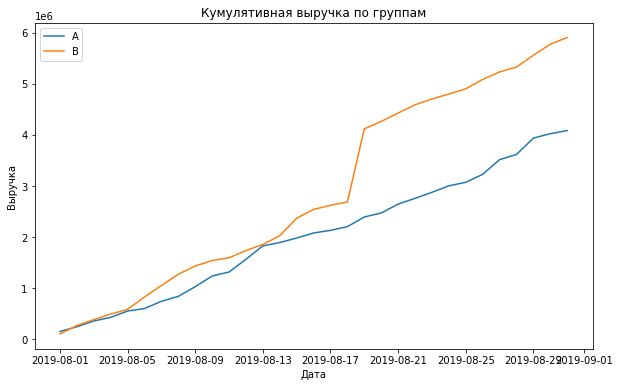

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.gcf().set_size_inches(10, 6)

plt.title("Кумулятивная выручка по группам")
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend() 

**Вывод:** Сегмент В лидирует на все отрезке времени, но в середине сильно вырвался вперед возможно есть аномальный заказы.

Построим график кумулятивного среднего чека по группам.

Text(0, 0.5, 'Средний чек')

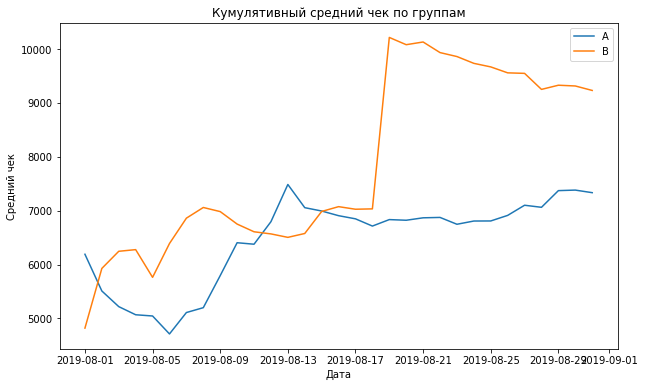

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.title("Кумулятивный средний чек по группам")
plt.xlabel('Дата')
plt.ylabel('Средний чек')

**Вывод:** Есть сильные колебания по В сегменту, решения по метрике принимать рано, нужно проверить на выбросы.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Text(0, 0.5, 'Изменение среднего чека')

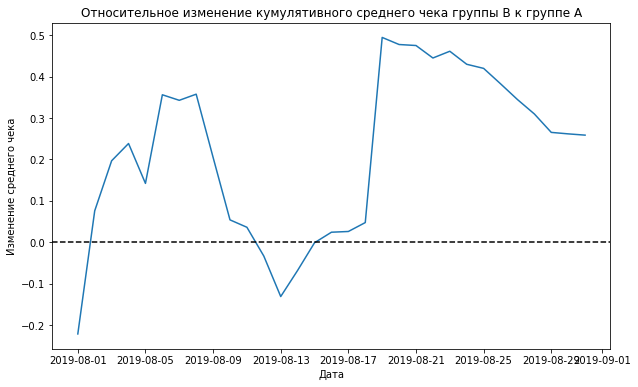

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                    right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
                                           mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/
                                                                                mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.gcf().set_size_inches(10, 6)
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')

**Вывод:** Результаты теста сильно менялись. Скорее всего были аномальные заказы.

Построим график кумулятивного среднего количества заказов на посетителя по группам

Text(0, 0.5, 'Среднее количество заказов')

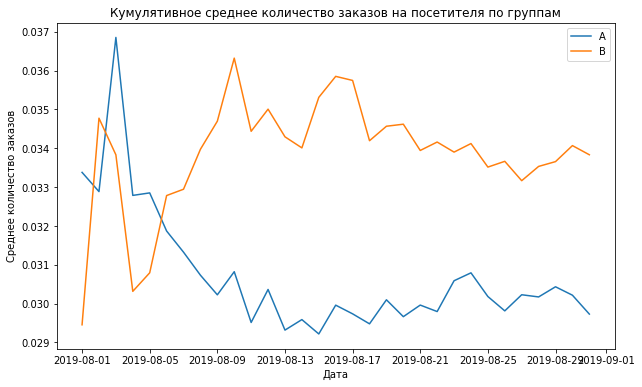

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.title("Кумулятивное среднее количество заказов на посетителя по группам")
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')

**Вывод:** Есть сильные колебания по В сегменту, В сегмент сильно превышает сегмент А, решения по метрике принимать рано, нужно проверить на выбросы.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Text(0, 0.5, 'Изменение кумулятивного среднего количества заказов')

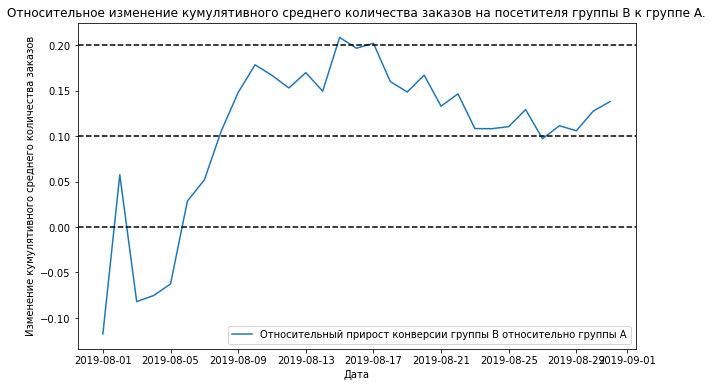

In [20]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.gcf().set_size_inches(10, 6)
plt.title("Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.")
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего количества заказов')

**Вывод:** Вначале группа В проигрывала А, но затем резко выросла и зафиксировалась на 15%.

### Анализ выбросов

Построим точечный график количества заказов по пользователям. 

Text(0, 0.5, 'Заказы по пользователям')

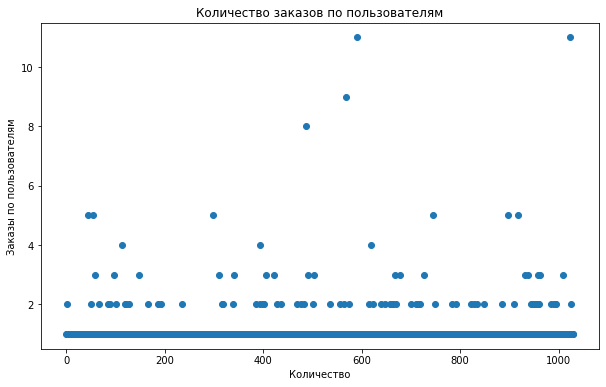

In [21]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.gcf().set_size_inches(10, 6)
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("Количество заказов по пользователям")
plt.xlabel('Количество')
plt.ylabel('Заказы по пользователям')

**Вывод:** Есть небольшое число пользователей с заказами более 6 шт. - они могут быть аномальными. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [22]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


**Вывод:** 
- В 1% заказов входят аномальные пользователи с более 4 заказов. 
- Предлагается установить нижнюю границу на уровне 4 заказов.

Построим точечный график стоимостей заказов.

Text(0, 0.5, 'Стоимость заказов')

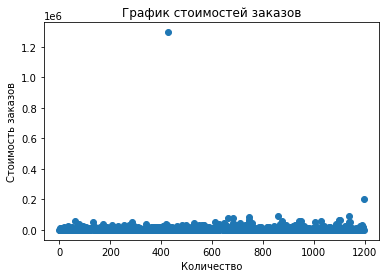

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title("График стоимостей заказов")
plt.xlabel('Количество')
plt.ylabel('Стоимость заказов')

Text(0, 0.5, 'Стоимость заказов')

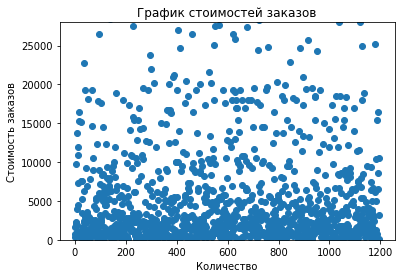

In [24]:
# ограничим ось Y, чтобы увидеть основную часть заказов:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.ylim(0, 28000)
plt.title("График стоимостей заказов")
plt.xlabel('Количество')
plt.ylabel('Стоимость заказов')

**Вывод:** Есть пару аномальных значений. 

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [25]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


**Вывод:** 
- 95й персентиль стоимости заказов - 28 тыс., 99й - 58 тыс. 
- Предлагается выбрать нижнюю границу стоимости заказов на уровне 95-го перцентиля - 28 тыс. 

### Расчет статистической значимости сырых данных

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы: 
- Нулевая: различий в среднем количестве заказов на пользователя между группами нет. 
- Альтернативная: различия в среднем между группами есть.

Значение alpha - 0.05.

Метод проверки гипотез: непараметрический тест Уилкоксона-Манна-Уитни.

In [26]:
# Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Различие в средних В к А:', "{0:.3f}".format((data['ordersPerDateB'].sum()/
                                                                              data['visitorsPerDateB'].sum())/
                       (data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value: 0.017
Различие в средних В к А: 0.138


**Вывод:** P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. В среднем количестве заказов между группами есть статистически значимые отличия. Относительный прирост среднего группы В к группе А равен 13,8%.  

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Значение alpha - 0.05.

Метод проверки гипотез: непараметрический тест Уилкоксона-Манна-Уитни.

In [27]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print('Различие в средних В к А:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                    orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Различие в средних В к А: 0.259


Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Вывод:** P-value сильно выше 0.05 - статистически значимых отличий в среднем чеке заказа между группами нет. Относительное различие среднего чека между сегментами 25,9%. Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.

### Расчет статистической значимости очищенных данных

Ранее сделали расчет, что 95й персентиль стоимости заказов - 28 тыс., 99й - 58 тыс. 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. 

За аномальных пользователей примем тех, кто купил более 4х заказов (99й персентиль) и потратил более 28 тыс. (95й персентиль). 

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различие в средних В к А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.018
Различие в средних В к А: 0.148


**Вывод:** Как из с сырыми данными, статистическая значимость достигнута. Сегмент В лучше чем А. Относительный прирост среднего группы В к группе А равен 14,8%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [29]:
print('p-value:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Различие в средних В к А:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.977
Различие в средних В к А: -0.017


**Вывод:** P-value сильно выше 0.05 - статистически значимых отличий в среднем чеке заказа по очищенным данным между группами нет. Относительное различие среднего чека между сегментами по сравнению с сырыми данными снизилось по сравнению с сырыми данными.

## Выводы по результатам теста

- Учитывая динамику на графиках тест можно остановить, его продолжение не повлияет на результаты. 
- По результатам теста есть различие в среднем количестве заказов между группами А и В как на сырых, так и на очищенных данных. Группа В значительно лучше А по данной метрике. Относительный прирост среднего группы В к группе А равен 14,8%.
-  При этом различия в среднем чеке между группами А и В отсутствует, т.е. предложенная гипотеза не приводит к росту среднего чека, а только к росту числа заказов. 